# Deep Learning

## Examen Agosto 2022

## Ejercicio 1.

Descargar el dataset desde el [siguiente link](https://drive.google.com/file/d/19SrZcnAWM0k2RGPeeul65wqycci1jS05/view). Entrenar el modelo propuesto a continuación de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por qué? Explicar el procedimiento realizado.

$ y_{hat} = X^3 W_1 + X^2 W_2 + XW_1 + b$

### Librerías y funciones globales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. EDA

In [2]:
df = pd.read_csv('data/dataset_1.csv')

In [3]:
df.head()

,# X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [4]:
df.shape

(10000, 2)

In [5]:
df.describe()

,# X,Y
count,10000.000000,10000.000000
mean,1.000000,2.029839
std,0.577437,2.303106
min,0.000000,-0.897512
25%,0.500000,0.383598
50%,1.000000,1.105209
75%,1.500000,3.831945
max,2.000000,8.912945


<AxesSubplot:xlabel='# X', ylabel='Y'>

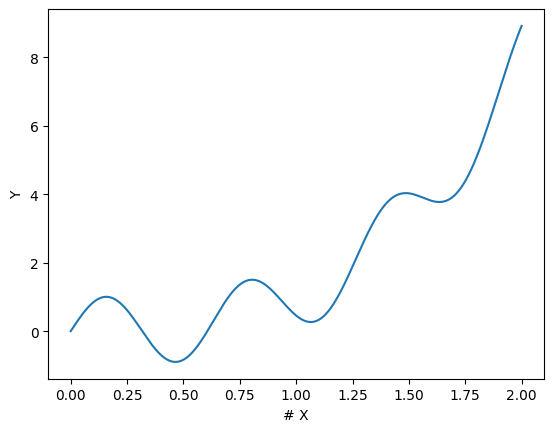

In [6]:
sns.lineplot(data=df, x="# X", y="Y")

In [7]:
x= df["# X"].to_numpy().reshape(-1, 1)
y= df["Y"].to_numpy().reshape(-1, 1)

In [8]:
class Model:
    def __init__(self, X, y, seed=42, lr=0.01, batch_size=32):
        np.random.seed(seed)
        self.W1 = np.random.rand(1)
        self.W2 = np.random.rand(1)
        self.b = np.zeros(1)
        self.X = X
        self.y = y
        self.lr = lr
        self.batch_size = batch_size
    
    def mean_squeared_error(self, y, y_hat):
        mse = (1 / y.shape[0]) * np.sum(np.power((y - y_hat), 2))
        return mse
    
    def forward(self, x):
        y_hat = np.power(x, 3) * self.W1 + np.power(x, 2) * self.W2 + x * self.W1 + self.b
        return y_hat
    
    def backward(self, x, y, y_hat):
        self.W1 = self.W1 - self.lr * ((-2 * (y - y_hat)) * ((np.power(x, 3)) + x))
        self.W2 = self.W2 - self.lr * ((-2 * (y - y_hat)) * ((np.power(x, 2))))
        self.b = self.b - self.lr * (-2 * (y - y_hat))
        
    
    def train(self, epochs):
        print('Training...')
        # SGD
        errors = []
        for i in range(epochs):
            batch_errors = []
            start = 0
            end = start + self.batch_size
            for x, y in zip(self.X[start:end], self.y[start:end]):
                y_hat = self.forward(x)
                error = self.mean_squeared_error(y, y_hat)
                self.backward(x, y, y_hat) #backprop
                batch_errors.append(error)
                
                start = end
                end += self.batch_size
                
            mean_batch_error = np.mean(batch_errors)
            print(f'epoch: {i + 1} | MSE loss: {mean_batch_error}')
            errors.append(mean_batch_error)
        return errors
    
    def predict(self, x):
        return self.forward(x)

In [9]:
n_epochs = 100
n = x.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.80 * n)]
test_idx = idx[int(0.80 * n):]

print(len(train_idx))
print(len(test_idx))

8000
2000


In [10]:
X_train = x[train_idx,:]
y_train = y[train_idx]
X_test = x[test_idx,:]
y_test = y[test_idx]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 1)
(8000, 1)
(2000, 1)
(2000, 1)


In [11]:
model = Model(X_train, y_train, batch_size=128)

In [12]:
history = model.train(n_epochs)

Training...
epoch: 1 | MSE loss: 1.1244388146220166
epoch: 2 | MSE loss: 1.05260498202951
epoch: 3 | MSE loss: 1.0209021794972994
epoch: 4 | MSE loss: 1.002050319299589
epoch: 5 | MSE loss: 0.987121831627264
epoch: 6 | MSE loss: 0.9737777645172718
epoch: 7 | MSE loss: 0.9613168512154846
epoch: 8 | MSE loss: 0.9495067616606082
epoch: 9 | MSE loss: 0.9382578022511785
epoch: 10 | MSE loss: 0.9275251108308582
epoch: 11 | MSE loss: 0.9172785612144381
epoch: 12 | MSE loss: 0.9074933957078504
epoch: 13 | MSE loss: 0.8981472749155821
epoch: 14 | MSE loss: 0.8892193229894098
epoch: 15 | MSE loss: 0.8806897953946798
epoch: 16 | MSE loss: 0.8725399421547576
epoch: 17 | MSE loss: 0.8647519336037127
epoch: 18 | MSE loss: 0.8573088071755588
epoch: 19 | MSE loss: 0.8501944222402005
epoch: 20 | MSE loss: 0.8433934188666801
epoch: 21 | MSE loss: 0.8368911791598482
epoch: 22 | MSE loss: 0.8306737906813739
epoch: 23 | MSE loss: 0.8247280117386777
epoch: 24 | MSE loss: 0.8190412384135385
epoch: 25 | MSE l

In [13]:
y_hat = model.predict(X_train)

[]

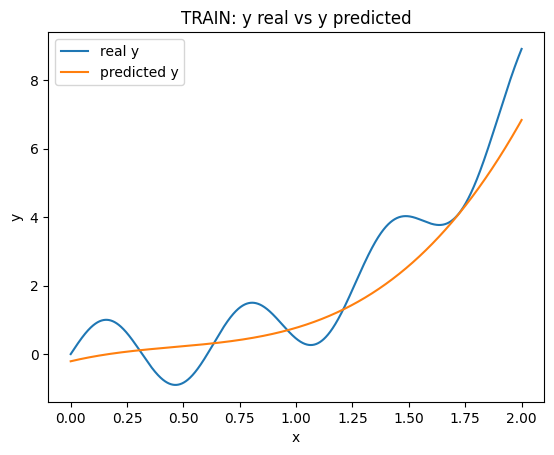

In [14]:
plot = sns.lineplot(x=np.squeeze(X_train), y=np.squeeze(y_train), label='real y')
plot = sns.lineplot(x=np.squeeze(X_train), y=np.squeeze(y_hat), label='predicted y')
plot.set(xlabel ='x', ylabel='y', title='TRAIN: y real vs y predicted')
plot.plot()

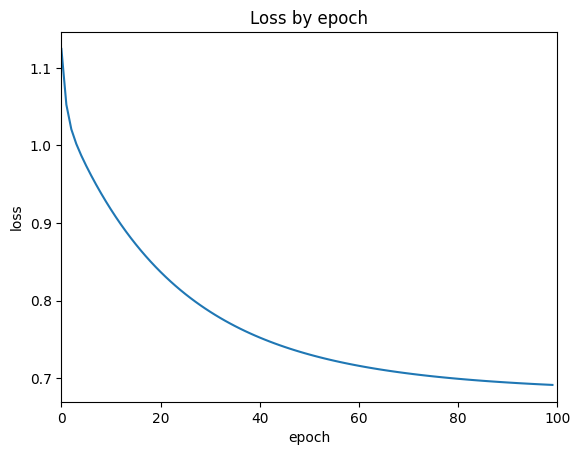

In [15]:
epochs = [i for i in range(n_epochs)]
plt.plot(epochs, history)
plt.xlim([0, n_epochs])
plt.title('Loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# Calculate Train MSE:
y_hat = model.predict(X_train)
MSE = model.mean_squeared_error(y_train, y_hat)
print(f'TRAIN MSE: {MSE}')

TRAIN MSE: 0.7971667270005222


In [17]:
# Calculate test MSE:
y_hat = model.predict(X_test)
MSE = model.mean_squeared_error(y_test, y_hat)
print(f'TRAIN MSE: {MSE}')

TRAIN MSE: 0.7993005654868768


### Conclusiones

Podemos observar que el modelo está haciendo un fit correcto sobre el dataset propuesto. Esto se debe a que el grado de la función proporcionada es menor al necesario para replicar exactamente el comportamiento de los datos. Esto se evidencia en la gráfica 'TRAIN: y real vs y predicted', donde podemos observar que si bien la curva del y_predicted sigue la misma tendencia que la de y_real, esta no copia exactamente cada curva. Además al calcular la métrica de MSE para el conjunto de datos de test, obtenemos resultados muy similares a los obtenidos para el conjunto de entrenamiento.

El procedimiento realizado para optimizar la función, fue el siguiente:
* Se escogió como función de pérdida MSE, por tratarse de un problema de regresión.
* Se implementó el algoritmo de mini batch para el entrenamiento del modelo, donde:
    - Para calcular el error se utilizó MSE, definida de la siguiente manera: 
   $J(y, y_{hat}) = (y - y_{hat})^2$ donde su derivada respecto de y_hat es
   $\frac{\partial J}{\partial y_{hat} } = - 2 (y - y_{hat})$
    - Para el paso forward se empleó como modelo la función propuesta.
    - Para el paso backward se computaron los nuevos valores de W1, W2 y b a partir de las siguientes derivadas parciales empleando regla de la cadena:
    
   $\frac{\partial J}{\partial W1} = \frac{\partial J}{\partial y_{hat} } . \frac{\partial y_{hat}}{\partial W1 } = - 2 (y - y_{hat}) . (x^3 + x) $	
   $\frac{\partial J}{\partial W2} = \frac{\partial J}{\partial y_{hat} } . \frac{\partial y_{hat}}{\partial W2 } = - 2 (y - y_{hat}) . (x^2) $	
   $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y_{hat} } . \frac{\partial y_{hat}}{\partial b } = - 2 (y - y_{hat})$	

  

***